In [ ]:
#This dataset contains sales data for a retail store, including information on orders, products, customers, and regions.
# Load the dataset and display the first 10 rows.
# Identify the total number of orders placed.
# Determine the top 5 products by total sales.
# Calculate the average sales per region.
# Find the month with the highest total sales.
# Analyze the relationship between discount and profit.
# Plot a bar chart showing the total sales for each product category.
# Plot a line graph of monthly sales to analyze how sales changed over time.
# Show a pie chart of total sales by region.
# Display a horizontal bar chart of the top 10 products with highest total sales.
# Create a scatter plot to see the relationship between discount and profit.
# Plot a sorted bar chart of sales for each sub-category, from lowest to highest.
# Use a stacked bar chart to show profit by customer segment across different regions.
# Plot a boxplot to understand the distribution of profit across different categories.
# Display a heatmap of the correlation matrix between numerical columns (e.g., sales, profit, discount, quantity).
# Show a bar chart of number of orders per shipping mode.


In [13]:
import pandas as pd
df=pd.read_csv("superstore.csv")
# Load the dataset and display the first 10 rows.
print(df.head(10))
print(df.columns)
# # Identify the total number of orders placed.
print(df["Order ID"].count())# this will count all rows but there might be multiple order with the same orderid 
print(df["Order ID"].nunique())
# Determine the top 5 products by total sales.
grouped=df.groupby("Product ID")["Sales"].sum()
grouped_sorted=grouped.sort_values(ascending=False)
print(grouped_sorted.head(5))
# Calculate the average sales per region.
df.groupby("Region")["Sales"].mean()
# Find the month with the highest total sales.
df["Order Date"]=pd.to_datetime(df["Order Date"],dayfirst=True)# Dates are stored in string format we chane its format to datetime
df["months"]=df["Order Date"].dt.month

sales_data=df.groupby("months")["Sales"].sum()
print(sales_data.max())
print(sales_data.idxmax())
# Analyze the relationship between discount and profit.



   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
5       6  CA-2015-115812  09/06/2015  14/06/2015  Standard Class    BH-11710   
6       7  CA-2015-115812  09/06/2015  14/06/2015  Standard Class    BH-11710   
7       8  CA-2015-115812  09/06/2015  14/06/2015  Standard Class    BH-11710   
8       9  CA-2015-115812  09/06/2015  14/06/2015  Standard Class    BH-11710   
9      10  CA-2015-115812  09/06/2015  14/06/2015  Standard Class    BH-11710   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  

<Axes: xlabel='Category'>

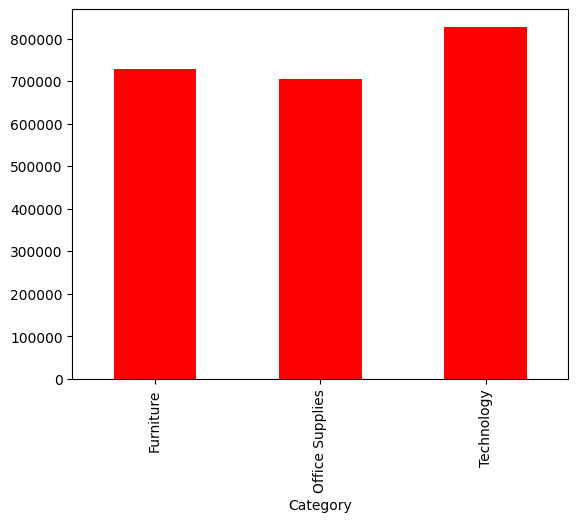

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot a bar chart showing the total sales for each product category.
df1=df.groupby("Category")["Sales"].sum()
#When you try to do df1.set_index("Category"), it fails because Category is already the index, and it's not a column anymore, so .set_index() throws an error.
#df1.set_index("Category")["Sales"].plot(kind="bar") # not working because when df1 after group by already has only one column Category no need to set index
df1.plot(kind="bar",color="red")

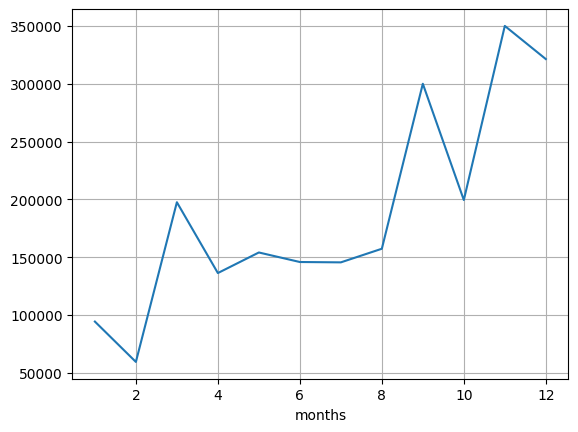

In [ ]:
# Plot a line graph of monthly sales to analyze how sales changed over time.

import pandas as pd
import matplotlib.pyplot as plt
df["Order Date"]=pd.to_datetime(df["Order Date"],dayfirst=True)
dfmonths=df["Order Date"].dt.month
df["months"]=dfmonths
monthlysales=df.groupby("months")["Sales"].sum()
monthlysales.plot(kind="line")
plt.grid(True)

<Axes: title={'center': 'Total Sales BY reigon'}, ylabel='Sales'>

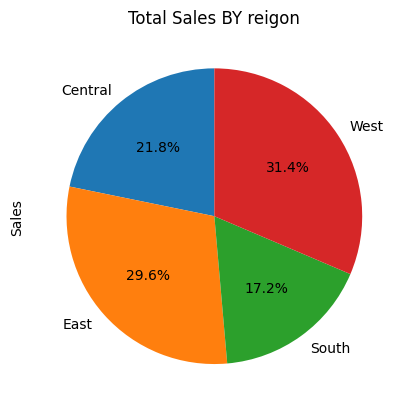

In [ ]:
# Show a pie chart of total sales by region.
import pandas as pd
import matplotlib.pyplot as plt
df.groupby("Region")["Sales"].sum().plot(kind="pie",autopct="%1.1f%%",title="Total Sales BY reigon",startangle=90)
#autopct="%1.1f%%" to automatically add percentage 1 point after the decimal % as escape character and add % to last

Text(0.5, 0, 'Total Sales')

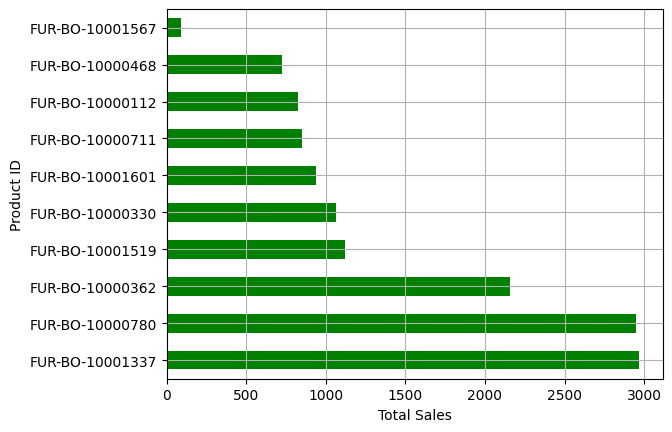

In [38]:
#Display a horizontal bar chart of the top 10 products with highest total sales.
import pandas as pd
import matplotlib.pyplot as pyplot
df.groupby("Product ID")["Sales"].sum().head(10).sort_values(ascending=False).plot(kind="barh",color="Green")
plt.grid(True)
plt.xlabel("Total Sales")



<Axes: xlabel='Category'>

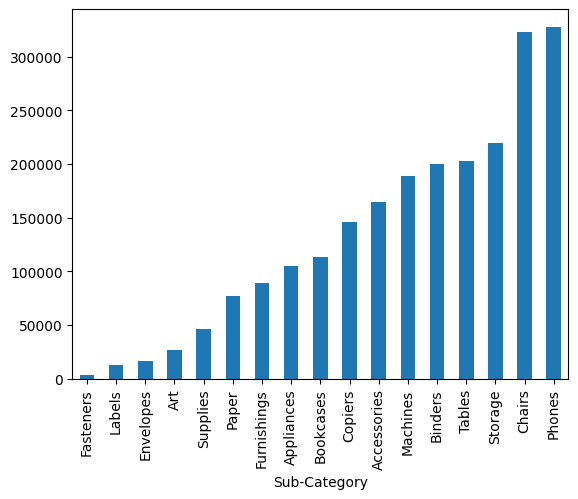

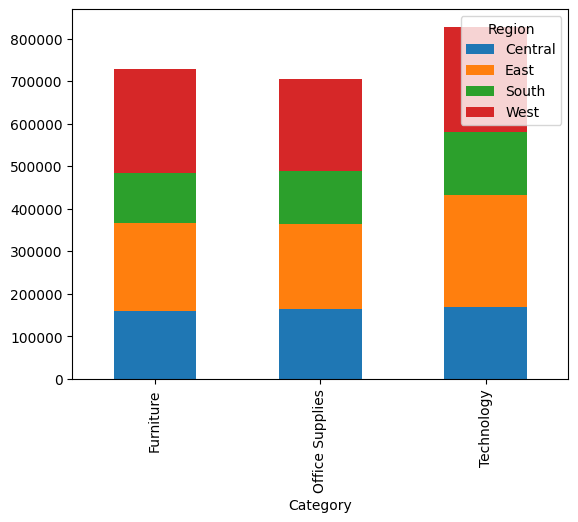

In [43]:
# Plot a sorted bar chart of sales for each sub-category, from lowest to highest.
import pandas as pd
import matplotlib.pyplot as plt
df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=True).plot(kind="bar",stacked=True)
# Total sales by Region and Category (stacked bar)
df.groupby(["Category", "Region"])["Sales"].sum().unstack().plot(kind="bar", stacked=True)

